# Importing Libraries

In [223]:

import os

data_dir ='C:\\Users\\Keerthi\\Desktop\\Jigsaw\\10 UC-Advance Analytics & Machine Learning\\02-Assignment\\Final Project\\working'
os.chdir(data_dir)

import pandas as pd
import numpy as np
import re
from sklearn.metrics import precision_score, recall_score,f1_score,classification_report,accuracy_score,confusion_matrix

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split


from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Reading  Train Dataset

In [2]:
train_woe = pd.read_csv('train_woe.csv')
print('Shape of the Dataset-->',train_woe.shape)
train_woe.head()


Shape of the Dataset--> (163010, 10)


,disbursed_amount_WoE,ltv_WoE,Age_WoE,AVERAGE_ACCT_AGE_WoE,PERFORM_CNS_SCORE_WoE,PRIMARY_INSTAL_AMT_WoE,PRI_CURRENT_BALANCE_WoE,PRI_NO_OF_ACCTS_WoE,NO_OF_INQUIRIES_WoE,loan_default
0,-0.613509,-0.543835,0.065064,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588,0
1,-0.247470,0.005106,-0.064586,-0.101429,0.144502,-0.365457,-0.098797,-0.161779,-0.037588,0
2,0.119263,0.222133,-0.064586,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588,0
3,0.119263,0.222133,-0.100875,-0.101429,0.099099,-0.091224,-0.098797,-0.299892,-0.037588,0
4,-0.446939,-0.543835,-0.064586,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588,0


# Reading  Test Dataset

In [3]:

test_woe = pd.read_csv('test_woe.csv')
print('Shape of the Dataset-->',test_woe.shape)
test_woe.head()



Shape of the Dataset--> (69884, 10)


,disbursed_amount_WoE,ltv_WoE,Age_WoE,AVERAGE_ACCT_AGE_WoE,PERFORM_CNS_SCORE_WoE,PRIMARY_INSTAL_AMT_WoE,PRI_CURRENT_BALANCE_WoE,PRI_NO_OF_ACCTS_WoE,NO_OF_INQUIRIES_WoE,loan_default
0,0.119263,0.222133,-0.100875,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588,0
1,-0.247470,-0.352510,0.030487,-0.101429,0.144502,-0.044568,-0.098797,-0.026540,-0.037588,0
2,0.119263,-0.352510,-0.012392,-0.101429,0.099099,0.010278,0.049865,0.080895,-0.037588,0
3,0.119263,0.222133,0.065064,-0.101429,0.144502,-0.044568,-0.098797,-0.299892,0.160101,0
4,0.119263,0.222133,0.065064,-0.101429,-0.356078,0.059947,0.012608,-0.026540,0.160101,0


# Reading  Loan Test Dataset for Prediction

In [215]:
loan_test_woe = pd.read_csv('loan_test_woe.csv')
print('Shape of the Dataset-->',loan_test_woe.shape)
loan_test_woe.head()


Shape of the Dataset--> (112392, 10)


,UniqueID,disbursed_amount_WoE,ltv_WoE,Age_WoE,AVERAGE_ACCT_AGE_WoE,PERFORM_CNS_SCORE_WoE,PRIMARY_INSTAL_AMT_WoE,PRI_CURRENT_BALANCE_WoE,PRI_NO_OF_ACCTS_WoE,NO_OF_INQUIRIES_WoE
0,655269,0.119263,0.222133,-0.100875,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588
1,723482,0.119263,0.222133,-0.012392,-0.101429,-0.356078,-0.044568,0.012608,-0.026540,0.160101
2,758529,0.227104,0.222133,0.148289,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588
3,763449,-0.247470,0.005106,-0.100875,-0.101429,0.099099,0.010278,-0.098797,0.028805,-0.037588
4,708663,0.119263,0.222133,-0.100875,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588


# Functions :

### PSI

Population stability Index : its the metric which checks the differnece between Actual traget varaibale and the predicted target variable

In [5]:
import numpy as np

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    def psi(expected_array, actual_array, buckets):
        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])



        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual psi value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

###  Plot Area under the ROC curve

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, auc,cohen_kappa_score
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(y, y_pred):
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure()
    plt.plot(fpr, tpr, 'b--', label='%s AUC = %0.4f' % ('Model: ', roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Area Under curve for predicting Defaulters')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0, fontsize='small')
    plt.show()
    


### Prints the Evaluation Metrics

In [7]:
def evaluate_model(Y_test, Y_pred, Ypred_proba = None):
   # if Ypred_proba is not None:
      #  print('ROC-AUC score of the model   : {}'.format(roc_auc_score(Ytest, Ypred_proba[:, 1])))
    print('ROC-AUC score of the model   :',roc_auc_score(Y_test,Y_pred))
    print('F1 Score                     : {}\n'.format(f1_score(Y_test, Y_pred)))
    print('Precision                    : {}\n'.format(precision_score(Y_test, Y_pred)))
    print('Recall                       : {}\n'.format(recall_score(Y_test, Y_pred)))
    #print('ROC-AUC score of the model   :',roc_auc_score(Y_test, Ypred_proba[:, 1]))
    print('Accuracy of the model        : {} \n'.format(accuracy_score(Y_test, Y_pred)))
    print('Confusion matrix             : \n{}\n'.format(confusion_matrix(Y_test, Y_pred)))
    print('Classification report        : \n{}\n'.format(classification_report(Y_test, Y_pred)))
   # plot_roc_curve(Y_test, Ypred_proba[:, 1])
    plot_roc_curve(Y_test, Y_pred)
def evaluate_model1(Y_test, Y_pred, Ypred_proba = None):
    if Ypred_proba is not None:
        print('ROC-AUC score of the model   : {}'.format(roc_auc_score(Ytest, Ypred_proba[:, 1])))
    #print('ROC-AUC score of the model   :',roc_auc_score(Y_test,Y_pred))
    print('F1 Score                     : {}\n'.format(f1_score(Y_test, Y_pred)))
    print('Precision                    : {}\n'.format(precision_score(Y_test, Y_pred)))
    print('Recall                       : {}\n'.format(recall_score(Y_test, Y_pred)))
    #print('ROC-AUC score of the model   :',roc_auc_score(Y_test, Ypred_proba[:, 1]))
    print('Accuracy of the model        : {} \n'.format(accuracy_score(Y_test, Y_pred)))
    print('Confusion matrix             : \n{}\n'.format(confusion_matrix(Y_test, Y_pred)))
    print('Classification report        : \n{}\n'.format(classification_report(Y_test, Y_pred)))
    plot_roc_curve(Y_test, Ypred_proba[:, 1])
    #plot_roc_curve(Y_test, Y_pred)   

###  Calculate scaled scores 

In [ ]:

def calc_score(df, feature, target, pr=0):
    lst = []
    df[feature] = df[feature].fillna("NULL")
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        
                    val,                                                            
                    df[df[feature] == val].count()[feature],                        
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Count', 'Bad'])
    data['Bad_Rate'] = data['Bad'] / data['Count']
    data['Percent_count']= data['Count']/data['Count'].sum()
    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr == 1:
        print(data)
    return  data


### Separating dependent and independent variables

In [8]:
x_train=train_woe.drop("loan_default", axis=1)
y_train=train_woe['loan_default']
x_test=test_woe.drop("loan_default", axis=1)
y_test=test_woe['loan_default']

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(163010, 9)
(163010,)
(69884, 9)
(69884,)


# Preparing the training data for Logistic Regression



### Add the constant term to the training data

In [10]:
x_train = sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [11]:

x_train.columns

Index(['const', 'disbursed_amount_WoE', 'ltv_WoE', 'Age_WoE',
       'AVERAGE_ACCT_AGE_WoE', 'PERFORM_CNS_SCORE_WoE',
       'PRIMARY_INSTAL_AMT_WoE', 'PRI_CURRENT_BALANCE_WoE',
       'PRI_NO_OF_ACCTS_WoE', 'NO_OF_INQUIRIES_WoE'],
      dtype='object')

In [12]:
x_train.shape

(163010, 10)

###  Apply GLM method & Fit the model

### BACKWARD selection regression

### Building the model on training dataset with all predictors

In [13]:
logit = sm.GLM(y_train, x_train, family=sm.families.Binomial())
result= logit.fit()
print(result.summary2())

                    Results: Generalized linear model
Model:                 GLM                AIC:              166340.6431  
Link Function:         logit              BIC:              -1789934.7498
Dependent Variable:    loan_default       Log-Likelihood:   -83160.      
Date:                  2019-05-22 10:44   LL-Null:          -85308.      
No. Observations:      163010             Deviance:         1.6632e+05   
Df Model:              9                  Pearson chi2:     1.63e+05     
Df Residuals:          163000             Scale:            1.0000       
Method:                IRLS                                              
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                   -1.2827   0.0061 -209.2364 0.0000 -1.2947 -1.2706
disbursed_amount_WoE     0.5539   0.0322   17.2055 0.0000 

    Interpretation:
    ----------------
       Though all the coeff are significant the Intutuion of the following variables should be -ve according to their weight of evidence
                Age_WoE  
                PRI_NO_OF_ACCTS_WoE 
                PRI_CURRENT_BALANCE_Wo 
           But the information value of Age_WoE is  0.008612 , which is less among those variables, and hence will be dropped

In [14]:
x_train=x_train.drop(['Age_WoE'], axis=1)
x_test=x_test.drop(['Age_WoE'], axis=1)

In [15]:
logit = sm.GLM(y_train, x_train, family=sm.families.Binomial())
result_2= logit.fit()
print(result_2.summary2())

                    Results: Generalized linear model
Model:                 GLM                AIC:              166476.7973  
Link Function:         logit              BIC:              -1789808.5972
Dependent Variable:    loan_default       Log-Likelihood:   -83229.      
Date:                  2019-05-22 10:44   LL-Null:          -85308.      
No. Observations:      163010             Deviance:         1.6646e+05   
Df Model:              8                  Pearson chi2:     1.63e+05     
Df Residuals:          163001             Scale:            1.0000       
Method:                IRLS                                              
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                   -1.2826   0.0061 -209.3615 0.0000 -1.2946 -1.2706
disbursed_amount_WoE     0.5897   0.0321   18.3850 0.0000 

          Interpretation:
          ----------------
       Though all the coeff are significant the Intutuion of the following variables should be -ve according to their weight of evidence
                  
                PRI_NO_OF_ACCTS_WoE 
                PRI_CURRENT_BALANCE_WoE
                
               But the information value of PRI_CURRENT_BALANCE_WoE (0.01142) ,  is less among those variables, and hence will be dropped  

In [16]:
x_train=x_train.drop(["PRI_CURRENT_BALANCE_WoE"], axis=1)
x_test=x_test.drop(["PRI_CURRENT_BALANCE_WoE"], axis=1)

In [17]:
    logit = sm.GLM(y_train, x_train, family=sm.families.Binomial())
    result= logit.fit()
    print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              166560.6595  
Link Function:        logit              BIC:              -1789734.7366
Dependent Variable:   loan_default       Log-Likelihood:   -83272.      
Date:                 2019-05-22 10:44   LL-Null:          -85308.      
No. Observations:     163010             Deviance:         1.6654e+05   
Df Model:             7                  Pearson chi2:     1.63e+05     
Df Residuals:         163002             Scale:            1.0000       
Method:               IRLS                                              
------------------------------------------------------------------------
                        Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                  -1.2826   0.0061 -209.4550 0.0000 -1.2946 -1.2706
disbursed_amount_WoE    0.5875   0.0321   18.3200 0.0000  0.5246  0.650

             Interpretation:
             ----------------
       Though all the coeff are significant the Intutuion of the following variables should be -ve according to their weight of evidence
                  
                PRI_NO_OF_ACCTS_WoE 
                PRIMARY_INSTAL_AMT_WoE  
                 
               But the information value of PRI_NO_OF_ACCTS_WoE (0.0117) ,  is less among those variables, and hence will be dropped  
               
               

In [18]:
x_train=x_train.drop(["PRI_NO_OF_ACCTS_WoE"], axis=1)
x_test=x_test.drop(["PRI_NO_OF_ACCTS_WoE"], axis=1)

In [19]:
logit = sm.GLM(y_train, x_train, family=sm.families.Binomial())
result= logit.fit()
print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              166772.0389  
Link Function:        logit              BIC:              -1789533.3587
Dependent Variable:   loan_default       Log-Likelihood:   -83379.      
Date:                 2019-05-22 10:44   LL-Null:          -85308.      
No. Observations:     163010             Deviance:         1.6676e+05   
Df Model:             6                  Pearson chi2:     1.63e+05     
Df Residuals:         163003             Scale:            1.0000       
Method:               IRLS                                              
------------------------------------------------------------------------
                        Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                  -1.2825   0.0061 -209.6570 0.0000 -1.2945 -1.2705
disbursed_amount_WoE    0.5864   0.0321   18.2925 0.0000  0.5236  0.649

In [21]:
logit = sm.GLM(y_train, x_train, family=sm.families.Binomial())
result= logit.fit()
print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              166772.0389  
Link Function:        logit              BIC:              -1789533.3587
Dependent Variable:   loan_default       Log-Likelihood:   -83379.      
Date:                 2019-05-22 10:44   LL-Null:          -85308.      
No. Observations:     163010             Deviance:         1.6676e+05   
Df Model:             6                  Pearson chi2:     1.63e+05     
Df Residuals:         163003             Scale:            1.0000       
Method:               IRLS                                              
------------------------------------------------------------------------
                        Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                  -1.2825   0.0061 -209.6570 0.0000 -1.2945 -1.2705
disbursed_amount_WoE    0.5864   0.0321   18.2925 0.0000  0.5236  0.649

             Interpretation:
             ----------------
        =========================================================================================

        
       disbursed_amount_WoE                     0.5864    
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of becoming DEFAULT increases. 
          o	 Intuition with sign: higher disbursed_amount have higher WoE and implies that the model suggest higher chance of becoming DEFAULT compared to lower disbursed_amount
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same.Higher the loan amount higher is the chance of geting DEFAULTED.

        =========================================================================================

    ltv_WoE                                  0.7568        
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of becoming DEFAULT increases. 
          o	 Intuition with sign: higher LTV have higher WoE and implies that the model suggest higher chance of becoming DEFAULT compared to lower LTV
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same.Higher the loan amount higher is the chance of geting DEFAULT.


        =========================================================================================
                 
    AVERAGE_ACCT_AGE_WoE                    0.0419     
  
        o	significance : Significant  as the p-value is <0.5 at confidence level of 95% 
        o	 sign : +ve ,which means that with increase of WoE the chance of becoming DEFAULT increases. 
        o	 Intuition with sign: Having higher account age have lower the risk in getting defaulted compared to lower account age.Old accounts have lesser WoE and implies that the model suggest lower the chance of becoming DEFAULT compared to low age  accounts.
        o  Crosschecking with data : this is evident in  train sample and the model reflects the same.Having the high account age have lower the  risk and has less chance of geting DEFAULT.  
        =========================================================================================
               
    PERFORM_CNS_SCORE_WoE                    1.0983 
    
        o    significance : Significant  as the p-value is <0.5 at confidence level of 95% 
        o     sign : +ve ,which means that with increase of WoE the chance of becoming DEFAULT increase. 
        o     Intuition with sign: Having more score have more risk in getting defaulted compared to less score. High score  have lesser WoE and implies that the model suggest lower the score ,chance of becoming DEFAULT is high compared to higher score.
        o  Crosschecking with data : this is evident in  train sample and the model reflects the same.Having the low score is the  risk and has high chance of geting DEFAULT.
   
        =========================================================================================
      
 
    NO_OF_INQUIRIES_WoE                      1.0757
    
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of becoming DEFAULT increases. 
          o	 Intuition with sign: higher the no of enquires have higher WoE and implies that the model suggest high the chance of becoming DEFAULT compared to less no of enquires.
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same.Having the more number of enuries have high risk of getting defaulted.

In [22]:
#Coefficients - Log of odds
result.params
print(result.params)

const                    -1.282537
disbursed_amount_WoE      0.586449
ltv_WoE                   0.756800
AVERAGE_ACCT_AGE_WoE      0.041941
PERFORM_CNS_SCORE_WoE     1.098299
PRIMARY_INSTAL_AMT_WoE    1.299636
NO_OF_INQUIRIES_WoE       1.075670
dtype: float64


####  Predicting the defaulters in train dataset

In [23]:
### Train dataset
pred_default_prob_train = result.predict(x_train)
pred_default_class_train = pred_default_prob_train.map (lambda x : 1 if x > 0.5 else 0)
print('Total predicted defaulted in train dataset-->',pred_default_prob_train.sum().round())
print('Actual Total defaulted in train dataset-->',y_train.sum())


Total predicted defaulted in train dataset--> 35404.0
Actual Total defaulted in train dataset--> 35404


F1 Score                     : 0.000959422089282691

Precision                    : 0.5

Recall                       : 0.00048017173200768276

ROC-AUC score of the model   : 0.606013316913336
Accuracy of the model        : 0.7828108704987424 

Confusion matrix             : 
[[127589     17]
 [ 35387     17]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    127606
           1       0.50      0.00      0.00     35404

   micro avg       0.78      0.78      0.78    163010
   macro avg       0.64      0.50      0.44    163010
weighted avg       0.72      0.78      0.69    163010




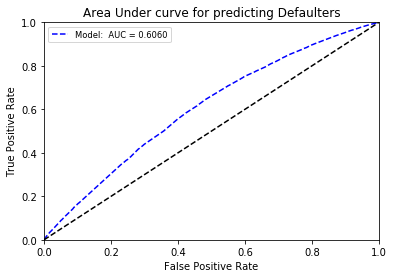

In [24]:
print('F1 Score                     : {}\n'.format(f1_score(y_train, pred_default_class_train)))
print('Precision                    : {}\n'.format(precision_score(y_train, pred_default_class_train)))
print('Recall                       : {}\n'.format(recall_score(y_train, pred_default_class_train)))
print('ROC-AUC score of the model   :',roc_auc_score(y_train, pred_default_prob_train))
print('Accuracy of the model        : {} \n'.format(accuracy_score(y_train, pred_default_class_train)))
print('Confusion matrix             : \n{}\n'.format(confusion_matrix(y_train, pred_default_class_train)))
print('Classification report        : \n{}\n'.format(classification_report(y_train, pred_default_class_train)))
plot_roc_curve(y_train, pred_default_prob_train)

####  Predicting the defaulters in Test dataset

In [25]:
### test dataset
pred_default_prob = result.predict(x_test)
print('Total predicted defaulted in test dataset-->',pred_default_prob.sum().round())
print('Actual Total defaulted in test dataset-->',y_test.sum())


Total predicted defaulted in test dataset--> 15161.0
Actual Total defaulted in test dataset--> 15176


###### From these numbers it kind of evident that the model is doing great!

### Mapping the Probability 

In [26]:
old_pred_default_prob=0.50
pred_default_class = pred_default_prob.map (lambda x : 1 if x > old_pred_default_prob else 0)
predicted_accuracy = sum(pred_default_class == y_test) / len(y_test)
print('old_pred_default is-->',old_pred_default_prob)


old_pred_default is--> 0.5


#  Validation of the Model


## Checking Accuracy Score 

#### (i)Accuracy score -Stats Model

In [27]:
import numpy
import pandas
predicted_accuracy = sum(pred_default_class == y_test) / len(y_test)
print('Accuracy score is    -->',predicted_accuracy)
print('Error rate is        -->',1-predicted_accuracy)


Accuracy score is    --> 0.7827256596645871
Error rate is        --> 0.21727434033541293


### Observations:

The Accuracy score  is almost 80%, which is a good score for a model.

# Calculate Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
confusion = confusion_matrix(y_test, pred_default_class)
confusion_matrix_d = pd.DataFrame(confusion, index=['Actually"not Defaulted"','Actually "Defaulted"'], \
                                columns=['Predicted "not Defaulted"','Predicted "Defaulted"'])

confusion_matrix_d


,"Predicted ""not Defaulted""","Predicted ""Defaulted"""
"Actually""not Defaulted""",54694,14
"Actually ""Defaulted""",15170,6


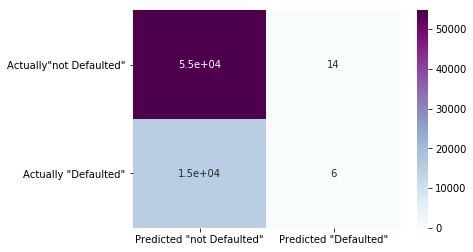

In [29]:
_=sns.heatmap(confusion_matrix_d, cmap='BuPu', annot=True)

### Calculate F1, precision and recall scores

In [30]:
from sklearn.metrics import precision_score, recall_score
f1_d=f1_score(y_test, pred_default_class)
prec_d = precision_score(y_test, pred_default_class)
rec_d = recall_score(y_test, pred_default_class)
print('F1_score            -->',f1_d)
print('precision_score     -->',prec_d)
print('recall_score        -->',rec_d)

F1_score            --> 0.0007896814951302974
precision_score     --> 0.3
recall_score        --> 0.00039536109646810753


We can see that the recall of the model is very low which means identifying the class 0 is very low.

### PSI

In [31]:
psi_Train_Data=calculate_psi(y_train,pred_default_class, buckettype='bins', buckets=10, axis=1)
psi_Test_Data=calculate_psi(y_test,pred_default_class, buckettype='bins', buckets=10, axis=1)
print('Population stability Index on train data is -->',psi_Train_Data)
print('Population stability Index on test data is -->',psi_Test_Data)

Population stability Index on train data is --> 1.491522427243841
Population stability Index on test data is --> 1.49128385928554


##### Observations:

The values are almost same and less than 10 ,so the two samples represent the same population

### AUC-ROC Curve

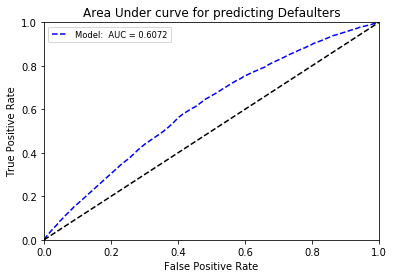

In [32]:
plot_roc_curve(y_test, result.predict(x_test))



      AUC :The higher the area under the curve the more it tells how good the classification model is at distinguishing between two classes of cases.
  

### optimal threshold probability from this ROC curve.

In [33]:
fpr, tpr, threshold = roc_curve(y_test, pred_default_prob)
optimal_index = np.argmax(tpr - fpr)
optimal_cutoff = threshold[optimal_index]
print('optimal_cutoff is --> ',optimal_cutoff) 
new_pred_default_class = np.where(pred_default_prob > optimal_cutoff, 1, 0)
print('new_pred_default_class is --> ',new_pred_default_class)

optimal_cutoff is -->  0.20895278263659645
new_pred_default_class is -->  [1 0 0 ... 0 1 1]


# ROC with optimal probability

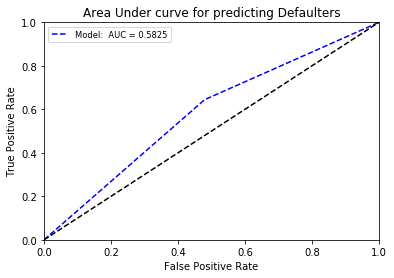

In [34]:
df=pd.DataFrame()
df['y'] =y_test
df['y_pred'] =new_pred_default_class 
area_UnderCurve = roc_auc_score(y_test, new_pred_default_class)
plot_roc_curve(y_test, new_pred_default_class)

In [35]:

from sklearn.metrics import confusion_matrix
new_confusion = confusion_matrix (y_test, new_pred_default_class)

new_confusion_matrix = pd.DataFrame(new_confusion, index=['Actually"not Defaulted"','Actually "Defaulted"'], columns=['Predicted "not Defaulted"','Predicted "Defaulted"'])
print('Confusion Matrix after cutoff prob')
new_confusion_matrix


Confusion Matrix after cutoff prob


,"Predicted ""not Defaulted""","Predicted ""Defaulted"""
"Actually""not Defaulted""",28481,26227
"Actually ""Defaulted""",5398,9778


In [36]:
print('Confusion Matrix before cutoff prob')
confusion_matrix_d


Confusion Matrix before cutoff prob


,"Predicted ""not Defaulted""","Predicted ""Defaulted"""
"Actually""not Defaulted""",54694,14
"Actually ""Defaulted""",15170,6


### Observations



We see that prediction power of the model has increased with the optimal cutoff probability value

##### Calculate the updated accuracy score 

In [37]:
from sklearn.metrics import accuracy_score
optimal_accuracy_score = sum(new_pred_default_class == y_test) / len(y_test)
predicted_accuracy = sum(pred_default_class == y_test) / len(y_test)
print('Actual_accuracy_score -->',predicted_accuracy)
print('optimal_accuracy_score is --> ',optimal_accuracy_score)


Actual_accuracy_score --> 0.7827256596645871
optimal_accuracy_score is -->  0.5474643695266441


    Accuracy Paradox:
As we can see here, accuracy can be misleading. Sometimes it may be desirable to select a model with a lower accuracy because it has a greater predictive power on the problem.
Here there is a large class imbalance, a model can predict the value of the majority class for all predictions and achieve a high classification accuracy, the problem is that this model is not useful in the problem domain. As we have to predict the default customers.

This is called the Accuracy Paradox. For problems like, this additional measures are required to evaluate a classifier.


## Calculate F1 Score

In [38]:
from sklearn.metrics import f1_score
f_d=f1_score(y_test, pred_default_class)
f_n=f1_score(y_test, new_pred_default_class)
print('before cutoff f1_score        -->',f_d)
print('After cutoff f1_score        -->',f_n)

before cutoff f1_score        --> 0.0007896814951302974
After cutoff f1_score        --> 0.38209491803598994


In [163]:
prec_n= precision_score(y_test, new_pred_default_class)
rec_n = recall_score(y_test, new_pred_default_class)
print('Before cutoff precision_score     -->',prec_d)
print('After cutoff precision_score     -->',prec_n)
print('Before cutoff recall_score        -->',rec_d)
print('After cutoff recall_score        -->',rec_n)

Before cutoff precision_score     --> 0.3
After cutoff precision_score     --> 0.2715733925843633
Before cutoff recall_score        --> 0.00039536109646810753
After cutoff recall_score        --> 0.6443068002108593


    Though we have moderate value of F1 score is evident that the performance of model is much better when the probability is taken as cutoff probbaility.
    The recall or the sensitivy has increased to 64%

# classification report

In [39]:
import sklearn.metrics as metrics
print('classification report BEFORE cutoff prob')
print(classification_report(y_test,pred_default_class))
print('classification report AFTER cutoff prob')
print(classification_report(y_test,new_pred_default_class))

classification report BEFORE cutoff prob
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54708
           1       0.30      0.00      0.00     15176

   micro avg       0.78      0.78      0.78     69884
   macro avg       0.54      0.50      0.44     69884
weighted avg       0.68      0.78      0.69     69884

classification report AFTER cutoff prob
              precision    recall  f1-score   support

           0       0.84      0.52      0.64     54708
           1       0.27      0.64      0.38     15176

   micro avg       0.55      0.55      0.55     69884
   macro avg       0.56      0.58      0.51     69884
weighted avg       0.72      0.55      0.59     69884



### observations

    Precision – What percent of your predictions were correct?
                Accuracy of positive predictions.

    Recall- What percent of the positive cases did you catch? 
            Fraction of positives that were correctly identified.
            
    F1 score – What percent of positive predictions were correct? 
                the weighted average of F1 should be used to compare classifier models, not global accuracy.
    

    In our case the positive case is to identfy the defaulters(class 1):
    -- The recall score of class 1 has increased by 64%  i.e we are able to identify the defaults more by 60%
    -- The precision score  of class 0 has increased i.e we are able to prediction level of the class 0 also increased.
    
    We can see that the precision for class 0(non-default) has increased and the recall for the class1(default) has increased. 
    This clearly shows the prediction level of the model has increased with the change of probability to cutoff probability.

# Using SCIKIT Learn module to fit the model on significant predictors


In [40]:
from sklearn.linear_model import LogisticRegression
logisticRegr_norm = LogisticRegression()
logisticRegr_norm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
print(list(zip(logisticRegr_norm.coef_[0], x_train)))

[(-0.6412299505297561, 'const'), (0.5860941480775292, 'disbursed_amount_WoE'), (0.7565457204779993, 'ltv_WoE'), (0.045146275403173806, 'AVERAGE_ACCT_AGE_WoE'), (1.0963693104589876, 'PERFORM_CNS_SCORE_WoE'), (1.2835691403210283, 'PRIMARY_INSTAL_AMT_WoE'), (1.0723000295535745, 'NO_OF_INQUIRIES_WoE')]


In [237]:
lr_pred_norm_train = logisticRegr_norm.predict(x_train)
lpred_proba_norm_train =logisticRegr_norm.predict_proba(x_train)
new_pred_default_train_class = np.where(lpred_proba_norm_train > optimal_cutoff, 1, 0)
new_pred_default_train_class

array([[1, 0],
       [1, 0],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])

In [42]:
lr_pred_norm = logisticRegr_norm.predict(x_test)
print('Predicted Classes            :',lr_pred_norm)
lpred_proba_norm =logisticRegr_norm.predict_proba(x_test)
print('Predicted Probability         :',lpred_proba_norm)


Predicted Classes            : [0 0 0 ... 0 0 0]
Predicted Probability         : [[0.72297444 0.27702556]
 [0.83724262 0.16275738]
 [0.80254763 0.19745237]
 ...
 [0.80263401 0.19736599]
 [0.75633895 0.24366105]
 [0.72297444 0.27702556]]


In [233]:
new_pred_default_class

array([1, 0, 0, ..., 0, 1, 1])

##### Prints the evaluation Metrics

ROC-AUC score of the model   : 0.5824535390247834
F1 Score                     : 0.38209491803598994

Precision                    : 0.2715733925843633

Recall                       : 0.6443068002108593

Accuracy of the model        : 0.5474643695266441 

Confusion matrix             : 
[[28481 26227]
 [ 5398  9778]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.52      0.64     54708
           1       0.27      0.64      0.38     15176

   micro avg       0.55      0.55      0.55     69884
   macro avg       0.56      0.58      0.51     69884
weighted avg       0.72      0.55      0.59     69884




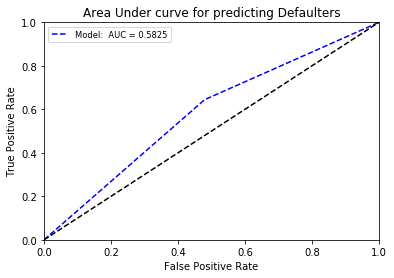

In [43]:
evaluate_model(y_test, new_pred_default_class, lpred_proba_norm)

# Resampling the minority class


In [45]:
loan_train = pd.concat([x_train.reset_index(drop='True'),y_train.reset_index(drop='True')],axis=1)
#test=pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True')],axis=1)

## minor_upsmapled

In [46]:
from sklearn.utils import resample
df_major = loan_train[loan_train.loan_default == 0]
df_minor = loan_train[loan_train.loan_default == 1]
df_minor_upsampled = resample(df_minor, replace = True, n_samples = 358436, random_state = 2018)
df_minor_upsampled = pd.concat([df_minor_upsampled, df_major])
df_minor_upsampled.loan_default.value_counts()

1    358436
0    127606
Name: loan_default, dtype: int64

In [47]:
ytrain_min_up = df_minor_upsampled['loan_default']
xtrain_min_up=df_minor_upsampled.drop(['loan_default'], axis=1)

In [48]:
xtest=x_test
ytest= y_test


In [49]:
print(xtrain_min_up.shape)
print(ytrain_min_up.shape)
print(xtest.shape)
print(ytest.shape)


(486042, 7)
(486042,)
(69884, 7)
(69884,)


## majority_downsmapled

In [53]:
from sklearn.utils import resample
tr1 = loan_train[loan_train['loan_default'] == 1]
tr2 = loan_train[loan_train['loan_default'] != 1]
print(tr1.shape,tr2.shape,loan_train.shape)
tr1 = resample(tr1, replace = True, n_samples = 100000, random_state = 51)
df_maj_downsampled = pd.concat([tr1, tr2])

(35404, 8) (127606, 8) (163010, 8)


In [54]:
df_minor_upsampled.loan_default.value_counts()

1    358436
0    127606
Name: loan_default, dtype: int64

In [55]:
df_maj_downsampled['loan_default'].value_counts()

0    127606
1    100000
Name: loan_default, dtype: int64

In [56]:
xtrain_maj_down = df_maj_downsampled.drop(['loan_default'], axis=1)
ytrain_maj_down =  df_maj_downsampled['loan_default']
xtest=x_test
ytest= y_test

# SMOTE 

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=51)
train_smote, y_smote = sm.fit_resample(x_train, y_train)


In [60]:
xtrain_smote = train_smote
ytrain_smote =  y_smote
xtest=x_test
ytest= y_test

# Applying balanced weights

In [66]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
print(class_weights)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

[0.63872388 2.302141  ]
{0: 0.6387238844568437, 1: 2.3021410010168344}


# LGBMClassifier

In [67]:
from lightgbm import LGBMClassifier
clf1 = LGBMClassifier(random_state=25)
clf1.fit(x_train, y_train)

clf2 = LGBMClassifier( random_state=25)
clf2.fit(xtrain_min_up, ytrain_min_up)

clf3 = LGBMClassifier( random_state=25)
clf3.fit(xtrain_maj_down, ytrain_maj_down)

clf4 = LGBMClassifier(random_state=25)
clf4.fit(xtrain_smote, ytrain_smote)

clf5 = LGBMClassifier(random_state=25, class_weight={0: 0.6386298893393229, 1: 1.5})
clf5.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt',
        class_weight={0: 0.6386298893393229, 1: 1.5}, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=25, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Prediction on train data

In [240]:
yp1 = clf1.predict(x_train)
yp2 = clf2.predict(x_train)
yp3 = clf3.predict(x_train)
yp4 = clf4.predict(x_train)
yp5 = clf5.predict(x_train)

yp = (yp1 + yp2 + yp3 + yp4 + yp5)/5


In [241]:
yp_prob1 = clf1.predict_proba(x_train)[:, 1]
yp_prob2 = clf2.predict_proba(x_train)[:, 1]
yp_prob3 = clf3.predict_proba(x_train)[:, 1]
yp_prob4 = clf4.predict_proba(x_train)[:, 1]
yp_prob5 = clf5.predict_proba(x_train)[:, 1]

yp_prob = (yp_prob1 + yp_prob2 + yp_prob3 + yp_prob4 + yp_prob5)/5

In [242]:
print('#######################  LGBMClassifier(Train data)  #########################')
Ytest =y_train
Ypred_norm=yp.round()
print('ROC-AUC score of the model:   ',roc_auc_score(y_train, yp_prob))
print('Accuracy of the model: ',(accuracy_score(y_train, Ypred_norm)))
print('Classification report: \n{}\n'.format(classification_report(Ytest, Ypred_norm)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(Ytest, Ypred_norm)))
print('F1 score: \n{}\n'.format(f1_score(Ytest, Ypred_norm)))
print('Precision: \n{}\n'.format(precision_score(Ytest, Ypred_norm)))
print('Recall: \n{}\n'.format(recall_score(Ytest, Ypred_norm)))
print('cohen_kappa_score: \n{}\n'.format(cohen_kappa_score(Ytest,Ypred_norm)))

#######################  LGBMClassifier(Train data)  #########################
ROC-AUC score of the model:    0.6218681487826595
Accuracy of the model:  0.642696767069505
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.69      0.75    127606
           1       0.30      0.47      0.36     35404

   micro avg       0.64      0.64      0.64    163010
   macro avg       0.56      0.58      0.56    163010
weighted avg       0.71      0.64      0.67    163010


Confusion matrix: 
[[88033 39573]
 [18671 16733]]

F1 score: 
0.36491113291898375

Precision: 
0.29717969665754984

Recall: 
0.4726302112755621

cohen_kappa_score: 
0.13394265515416337



### Prediction on test data

In [68]:
yp1 = clf1.predict(x_test)
yp2 = clf2.predict(x_test)
yp3 = clf3.predict(x_test)
yp4 = clf4.predict(x_test)
yp5 = clf5.predict(x_test)

yp = (yp1 + yp2 + yp3 + yp4 + yp5)/5



In [70]:
yp_prob1 = clf1.predict_proba(x_test)[:, 1]
yp_prob2 = clf2.predict_proba(x_test)[:, 1]
yp_prob3 = clf3.predict_proba(x_test)[:, 1]
yp_prob4 = clf4.predict_proba(x_test)[:, 1]
yp_prob5 = clf5.predict_proba(x_test)[:, 1]

yp_prob = (yp_prob1 + yp_prob2 + yp_prob3 + yp_prob4 + yp_prob5)/5



In [73]:
print('#######################  LGBMClassifier  #########################')
Ytest =y_test
Ypred_norm=yp.round()
print('ROC-AUC score of the model:   ',roc_auc_score(y_test, yp_prob))
print('Accuracy of the model: ',(accuracy_score(y_test, Ypred_norm)))
print('Classification report: \n{}\n'.format(classification_report(Ytest, Ypred_norm)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(Ytest, Ypred_norm)))
print('F1 score: \n{}\n'.format(f1_score(Ytest, Ypred_norm)))
print('Precision: \n{}\n'.format(precision_score(Ytest, Ypred_norm)))
print('Recall: \n{}\n'.format(recall_score(Ytest, Ypred_norm)))
print('cohen_kappa_score: \n{}\n'.format(cohen_kappa_score(Ytest,Ypred_norm)))

#######################  LGBMClassifier  #########################
ROC-AUC score of the model:    0.6118547704930328
Accuracy of the model:  0.6387442046820445
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.69      0.75     54708
           1       0.29      0.46      0.36     15176

   micro avg       0.64      0.64      0.64     69884
   macro avg       0.56      0.58      0.55     69884
weighted avg       0.71      0.64      0.66     69884


Confusion matrix: 
[[37601 17107]
 [ 8139  7037]]

F1 score: 
0.3579348931841302

Precision: 
0.2914595758780649

Recall: 
0.4636926726410121

cohen_kappa_score: 
0.12442988362867968



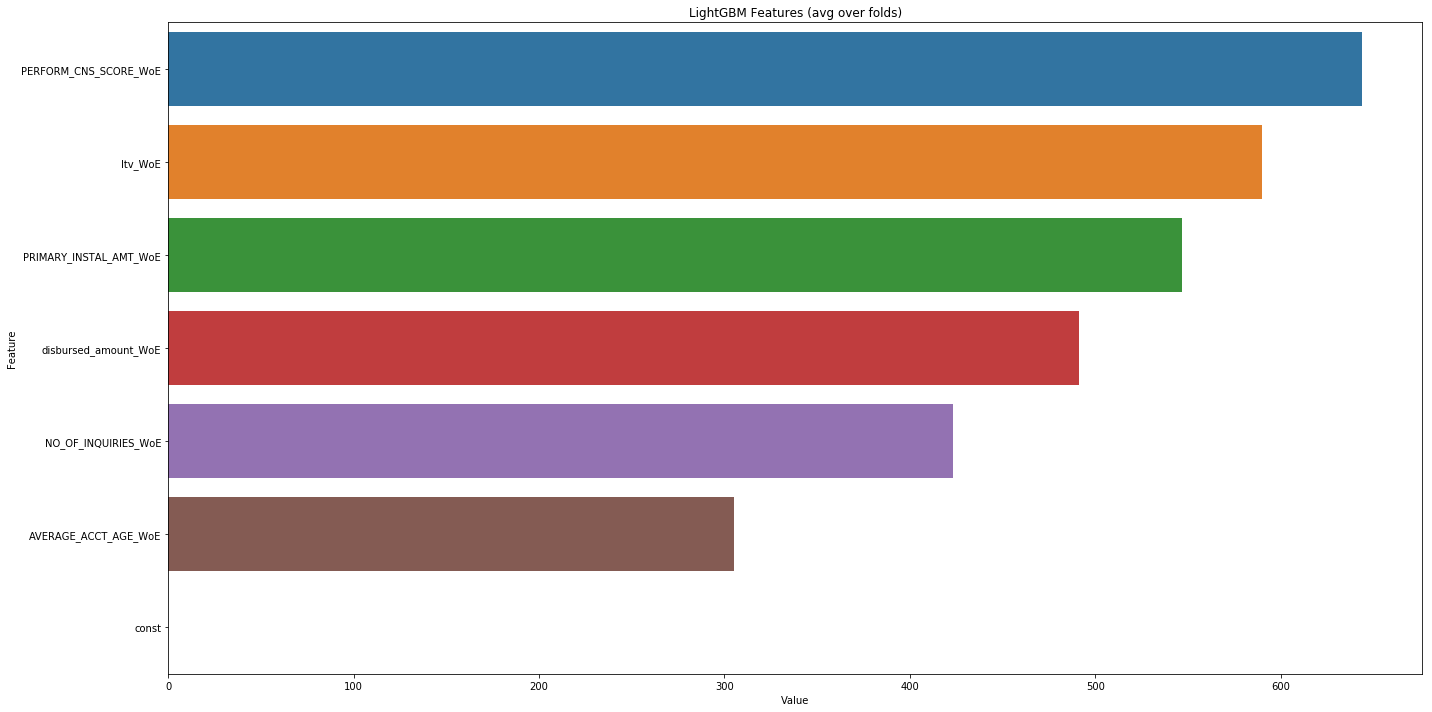

In [166]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(clf1.feature_importances_, x_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

Observations

    Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm
    We can see that both the test and train data are performing in the same way, which tells the model isfitting the test data as well.
   the train data is fitted on different resampling data so as we can average out the performance of the weak learners.

# Applying Light GBM Model - GridSearchCV

In [76]:
%%time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = {
    'n_estimators': [100,150,200,250],
    'max_depth': [5,6,7,8,9]
}


clf1 = LGBMClassifier(random_state=51)
clf1.fit(x_train, y_train)

clf2 = LGBMClassifier( random_state=51)
clf2.fit(xtrain_min_up, ytrain_min_up)

clf3 = LGBMClassifier( random_state=51)
clf3.fit(xtrain_maj_down, ytrain_maj_down)

clf4 = LGBMClassifier(random_state=51)
clf4.fit(xtrain_smote, ytrain_smote)
 
clf5 = LGBMClassifier(random_state=51, class_weight={0: 0.6386298893393229, 1: 1.5})
clf5.fit(x_train, y_train)

# clf = LGBMClassifier(random_state=25)
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 51)
print("--------------------       clf1          ---------------------------")
grid1 = GridSearchCV(estimator=clf1, param_grid=params, scoring='roc_auc', cv=skf.split(x_train, y_train), verbose=3 )
grid1.fit(x_train, y_train)


print("--------------------       clf2          ---------------------------")
grid2 = GridSearchCV(estimator=clf2, param_grid=params, scoring='roc_auc', cv=skf.split(x_train, y_train), verbose=3 )
grid2.fit(x_train, y_train)


print("--------------------       clf3          ---------------------------")
grid3 = GridSearchCV(estimator=clf3, param_grid=params, scoring='roc_auc', cv=skf.split(xtrain_smote, ytrain_smote), verbose=3 )
grid3.fit(xtrain_smote, ytrain_smote)

print("--------------------       clf4          ---------------------------")
grid4 = GridSearchCV(estimator=clf4, param_grid=params, scoring='roc_auc', cv=skf.split(xtrain_min_up, ytrain_min_up), verbose=3 )
grid4.fit(xtrain_min_up, ytrain_min_up)



print("--------------------       clf5          ---------------------------")
grid5 = GridSearchCV(estimator=clf5, param_grid=params, scoring='roc_auc', cv=skf.split(xtrain_maj_down, ytrain_maj_down), verbose=3 )
grid5.fit(xtrain_maj_down, ytrain_maj_down)


--------------------       clf1          ---------------------------
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=100, score=0.6140244757975596, total=   0.8s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.608354334612527, total=   0.7s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6095708158691786, total=   0.7s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6136089630524237, total=   1.1s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6073717933999871, total=   1.1s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6089756197229701, total=   1.0s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6129472290536948, total=   1.4s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6069001081938463, total=   1.6s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6083294290200426, total=   1.6s
[CV] max_depth=5, n_estimators=250 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.2min finished


--------------------       clf2          ---------------------------
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=100, score=0.6140244757975596, total=   1.1s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.608354334612527, total=   1.1s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6095708158691786, total=   1.1s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6136089630524237, total=   1.5s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6073717933999871, total=   1.6s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6089756197229701, total=   1.6s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6129472290536948, total=   1.8s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6069001081938463, total=   2.1s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6083294290200426, total=   1.7s
[CV] max_depth=5, n_estimators=250 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.4min finished


--------------------       clf3          ---------------------------
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=100, score=0.6354079118621719, total=   1.3s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6339005817252068, total=   1.3s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6321397469241306, total=   1.4s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6363867152355412, total=   2.2s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.635168208165897, total=   2.3s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6330691447942061, total=   2.0s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6370307193947901, total=   2.5s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6358503995264606, total=   2.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.633717301439183, total=   2.4s
[CV] max_depth=5, n_estimators=250 ..

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.3min finished


--------------------       clf4          ---------------------------
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=100, score=0.6174007501643676, total=   3.1s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6171985523807243, total=   3.0s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.616700272847283, total=   3.4s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6184470150033551, total=   4.9s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6179621458513072, total=   4.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6174752611460259, total=   4.0s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6190609419106331, total=   5.1s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6184682206503967, total=   5.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.618171860767805, total=   6.1s
[CV] max_depth=5, n_estimators=250 ..

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.3min finished


--------------------       clf5          ---------------------------
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=100, score=0.6137584128371975, total=   1.7s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6177532028053324, total=   1.6s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV]  max_depth=5, n_estimators=100, score=0.6146155293691176, total=   1.5s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6145997113676308, total=   2.1s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6181450983429547, total=   2.3s
[CV] max_depth=5, n_estimators=150 ...................................
[CV]  max_depth=5, n_estimators=150, score=0.6148836658226697, total=   2.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.615157780890837, total=   2.9s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6184510075969456, total=   2.6s
[CV] max_depth=5, n_estimators=200 ...................................
[CV]  max_depth=5, n_estimators=200, score=0.6153490834308837, total=   2.8s
[CV] max_depth=5, n_estimators=250 .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.3min finished


Wall time: 17min 54s


In [77]:
#print('\n All results:')
#print(grid1.cv_results_)
print('\n Best estimator:')
print(grid1.best_estimator_)
print('\n Best score:')
print(grid1.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid1.best_params_)
print('\n Best estimator:')
print(grid2.best_estimator_)
print('\n Best score:')
print(grid2.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid2.best_params_)
#print('\n All results:')
#print(grid3.cv_results_)
print('\n Best estimator:')
print(grid3.best_estimator_)
print('\n Best score:')
print(grid3.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid3.best_params_)
print('\n Best estimator:')
print(grid4.best_estimator_)
print('\n Best score:')
print(grid4.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid4.best_params_)
print('\n Best estimator:')
print(grid5.best_estimator_)
print('\n Best score:')
print(grid5.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid5.best_params_)


 Best estimator:
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=51, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Best score:
0.22129983366004202

 Best parameters:
{'max_depth': 5, 'n_estimators': 100}

 Best estimator:
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=51, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Best score:
0.221299833660042

### Predictipon on train data

In [243]:
yp_grid1 = grid1.predict(x_train)
yp_grid2 = grid2.predict(x_train)
yp_grid3 = grid3.predict(x_train)
yp_grid4 = grid4.predict(x_train)
yp_grid5 = grid5.predict(x_train)

yp_grid = (yp_grid1 + yp_grid2 + yp_grid3 + yp_grid4 + yp_grid5)/5
yp_grid=yp_grid.round()

In [244]:
yp_grid_prob1 = grid1.predict_proba(x_train)[:, 1]
yp_grid_prob2 = grid2.predict_proba(x_train)[:, 1]
yp_grid_prob3 = grid3.predict_proba(x_train)[:, 1]
yp_grid_prob4 = grid4.predict_proba(x_train)[:, 1]
yp_grid_prob5 = grid5.predict_proba(x_train)[:, 1]

yp_grid_prob = (yp_grid_prob1 + yp_grid_prob2 + yp_grid_prob3 + yp_grid_prob4 + yp_grid_prob5)/5

In [245]:
from sklearn.metrics import cohen_kappa_score
print('#######################  LGBMClassifier -GRID Search CV  #########################')
Ytest =y_train
yp_gridred_norm=yp_grid
print('ROC-AUC score of the model:   ',roc_auc_score(Ytest, yp_grid_prob))
print('Accuracy of the model: ',(accuracy_score(Ytest, yp_gridred_norm)))
print('Classification report: \n{}\n'.format(classification_report(Ytest, yp_gridred_norm)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(Ytest, yp_gridred_norm)))
print('F1 score: \n{}\n'.format(f1_score(Ytest,yp_gridred_norm)))
print('Precision score: \n{}\n'.format(precision_score(Ytest,yp_gridred_norm)))
print('Recall score: \n{}\n'.format(recall_score(Ytest,yp_gridred_norm)))

#######################  LGBMClassifier -GRID Search CV  #########################
ROC-AUC score of the model:    0.6242610521778025
Accuracy of the model:  0.5793386908778603
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.57      0.68    127606
           1       0.28      0.60      0.38     35404

   micro avg       0.58      0.58      0.58    163010
   macro avg       0.56      0.59      0.53    163010
weighted avg       0.72      0.58      0.62    163010


Confusion matrix: 
[[73158 54448]
 [14124 21280]]

F1 score: 
0.38296800201562103

Precision score: 
0.2810057046270864

Recall score: 
0.601062026889617



### Prediction on test data

In [78]:
yp_grid1 = grid1.predict(x_test)
yp_grid2 = grid2.predict(x_test)
yp_grid3 = grid3.predict(x_test)
yp_grid4 = grid4.predict(x_test)
yp_grid5 = grid5.predict(x_test)

yp_grid = (yp_grid1 + yp_grid2 + yp_grid3 + yp_grid4 + yp_grid5)/5
yp_grid=yp_grid.round()

In [79]:
yp_grid_prob1 = grid1.predict_proba(x_test)[:, 1]
yp_grid_prob2 = grid2.predict_proba(x_test)[:, 1]
yp_grid_prob3 = grid3.predict_proba(x_test)[:, 1]
yp_grid_prob4 = grid4.predict_proba(x_test)[:, 1]
yp_grid_prob5 = grid5.predict_proba(x_test)[:, 1]

yp_grid_prob = (yp_grid_prob1 + yp_grid_prob2 + yp_grid_prob3 + yp_grid_prob4 + yp_grid_prob5)/5

In [81]:
from sklearn.metrics import cohen_kappa_score
print('#######################  LGBMClassifier -GRID Search CV  #########################')
Ytest =y_test
yp_gridred_norm=yp_grid
print('ROC-AUC score of the model:   ',roc_auc_score(Ytest, yp_grid_prob))
print('Accuracy of the model: ',(accuracy_score(Ytest, yp_gridred_norm)))
print('Classification report: \n{}\n'.format(classification_report(Ytest, yp_gridred_norm)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(Ytest, yp_gridred_norm)))
print('F1 score: \n{}\n'.format(f1_score(Ytest,yp_gridred_norm)))
print('Precision score: \n{}\n'.format(precision_score(Ytest,yp_gridred_norm)))
print('Recall score: \n{}\n'.format(recall_score(Ytest,yp_gridred_norm)))

#######################  LGBMClassifier -GRID Search CV  #########################
ROC-AUC score of the model:    0.6105074752501121
Accuracy of the model:  0.5777574265926392
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.58      0.68     54708
           1       0.28      0.59      0.38     15176

   micro avg       0.58      0.58      0.58     69884
   macro avg       0.56      0.58      0.53     69884
weighted avg       0.71      0.58      0.61     69884


Confusion matrix: 
[[31459 23249]
 [ 6259  8917]]

F1 score: 
0.3767056736090575

Precision score: 
0.27721818068768267

Recall score: 
0.5875724828676858



# Decision tree

In [83]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import sklearn.tree as tree
clf_d=tree.DecisionTreeClassifier(random_state=23)                                
clf_d.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=23,
            splitter='best')

In [139]:
#predictions on train data
predictions_train_d = clf_d.predict(x_train)
predict_prob_train=clf_d.predict_proba(x_train)
print('Total predicted defaulted in train dataset-->',predict_prob_train.sum().round())
print('Actual Total defaulted in train dataset-->',y_train.sum())
df=pd.DataFrame({'Actual':y_train, 'Predicted':predictions_train_d}) 
df.head()

Total predicted defaulted in train dataset--> 163010.0
Actual Total defaulted in train dataset--> 35404


,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0


ROC-AUC score of the model   : 0.5939266844079906
F1 Score                     : 0.38885272952284916

Precision                    : 0.2878489705622888

Recall                       : 0.5990566037735849

Accuracy of the model        : 0.5910250904852463 

Confusion matrix             : 
[[75134 52472]
 [14195 21209]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.59      0.69    127606
           1       0.29      0.60      0.39     35404

   micro avg       0.59      0.59      0.59    163010
   macro avg       0.56      0.59      0.54    163010
weighted avg       0.72      0.59      0.63    163010




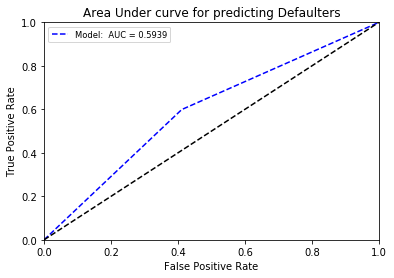

In [86]:
evaluate_model(y_train, predictions_train_d,predict_prob_train)


In [87]:
#predictions on test data
predictions_d = clf_d.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions_d}) 
#calculating probabilities of predictions
predict_prob=clf_d.predict_proba(x_test)


In [88]:
### test dataset
pred_default_prob = clf_d.predict(x_test)
print('Total predicted defaulted in test dataset-->',pred_default_prob.sum().round())
print('Actual Total defaulted in test dataset-->',y_test.sum())

Total predicted defaulted in test dataset--> 31393
Actual Total defaulted in test dataset--> 15176


In [89]:
#predictions on test data
predictions_test_d = clf_d.predict(x_test)
predict_prob_test=clf_d.predict_proba(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions_test_d}) 
df.head()

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


ROC-AUC score of the model   : 0.5779730979085242
F1 Score                     : 0.3723507054048831

Precision                    : 0.27617621762813366

Recall                       : 0.5712967843964154

Accuracy of the model        : 0.5817497567397402 

Confusion matrix             : 
[[31985 22723]
 [ 6506  8670]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.83      0.58      0.69     54708
           1       0.28      0.57      0.37     15176

   micro avg       0.58      0.58      0.58     69884
   macro avg       0.55      0.58      0.53     69884
weighted avg       0.71      0.58      0.62     69884




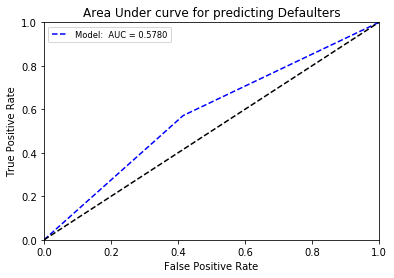

In [90]:
 #Prints the evaluation Metrics
evaluate_model(y_test, predictions_test_d,predict_prob_test)

In [91]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
score_ls = [] 
score_acc_ls = []

for tree_depth in [1,2,3,4,5,6,7,8,9,10,11]:
            tree_model = DecisionTreeClassifier(max_depth=tree_depth,random_state=23)
            tree_model.fit(x_train, y_train)
            scores = cross_val_score(tree_model, x_test,y_test, cv=10, scoring='roc_auc') 
            score_ls.append(np.mean(scores))
            predictions_op = tree_model.predict(x_test)
            acc_scores=  accuracy_score(y_test, predictions_op)         
            score_acc_ls.append((acc_scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,6,7,8,9,10,11]), pd.Series(score_ls).round(3), pd.Series(score_acc_ls).round(3)], axis=1)
temp.columns = ['depth', 'Roc_Auc', 'Accuracy score']
print(temp)

    depth  Roc_Auc  Accuracy score
0       1    0.548           0.452
1       2    0.580           0.572
2       3    0.594           0.522
3       4    0.603           0.531
4       5    0.606           0.540
5       6    0.608           0.540
6       7    0.607           0.567
7       8    0.606           0.570
8       9    0.604           0.569
9      10    0.603           0.569
10     11    0.603           0.574


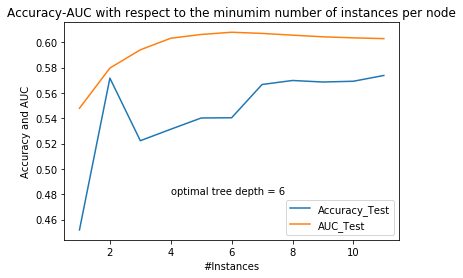

In [92]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
acc_test = []
auc_test = []
for k in range(1,12):
        tree1 = DecisionTreeClassifier(max_depth=k,random_state=23)
        clf=tree1.fit(x_train, y_train) 
        predictions_test = clf.predict(x_test)
        acc_scores_test = accuracy_score(y_test, predictions_test) 
        acc_test.append(acc_scores_test)
       
        
       
        scores_test = cross_val_score(clf, x_test,y_test, cv=10, scoring='roc_auc') 
     
        auc_test.append(np.mean(scores_test))
        
ax0.plot(range(1,12),acc_test,label='Accuracy_Test')
ax0.plot(range(1,12),auc_test,label='AUC_Test')
ax0.legend()
ax0.set_title('Accuracy-AUC with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy and AUC')
plt.text(4, .48, "optimal tree depth = 6")
plt.show()

In [93]:
clf_op=DecisionTreeClassifier(random_state=11,max_depth=6)
clf_op.fit(x_train,y_train)
predictions_op = clf_op.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions_op})  
predict_prob_op=clf_op.predict_proba(x_test)
df.head()

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


##### Evalauation metrics on train data

ROC-AUC score of the model   : 0.5831252747499256
F1 Score                     : 0.3837246570951915

Precision                    : 0.2705935533224382

Recall                       : 0.6594170150265507

Accuracy of the model        : 0.539973007790933 

Confusion matrix             : 
[[64675 62931]
 [12058 23346]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.51      0.63    127606
           1       0.27      0.66      0.38     35404

   micro avg       0.54      0.54      0.54    163010
   macro avg       0.56      0.58      0.51    163010
weighted avg       0.72      0.54      0.58    163010




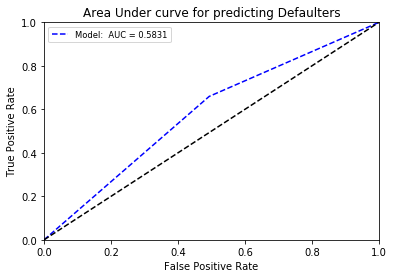

In [94]:
predictions_train_op = clf_op.predict(x_train)
predict_prob_train_op=clf_op.predict_proba(x_train)
evaluate_model(y_train, predictions_train_op,predict_prob_train_op)

##### Evalauation metrics on test data

ROC-AUC score of the model   : 0.5813486362388457
F1 Score                     : 0.38187241412489176

Precision                    : 0.26970018211965535

Recall                       : 0.6537954665260939

Accuracy of the model        : 0.5403668937095759 

Confusion matrix             : 
[[27841 26867]
 [ 5254  9922]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.51      0.63     54708
           1       0.27      0.65      0.38     15176

   micro avg       0.54      0.54      0.54     69884
   macro avg       0.56      0.58      0.51     69884
weighted avg       0.72      0.54      0.58     69884




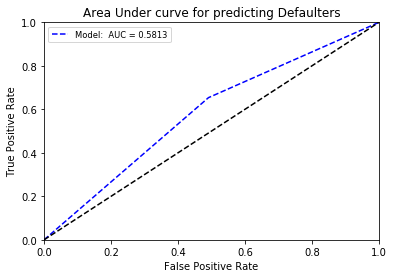

In [95]:

evaluate_model(y_test, predictions_op,predict_prob_op)


## Decision Tree Visualisation:

In [96]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

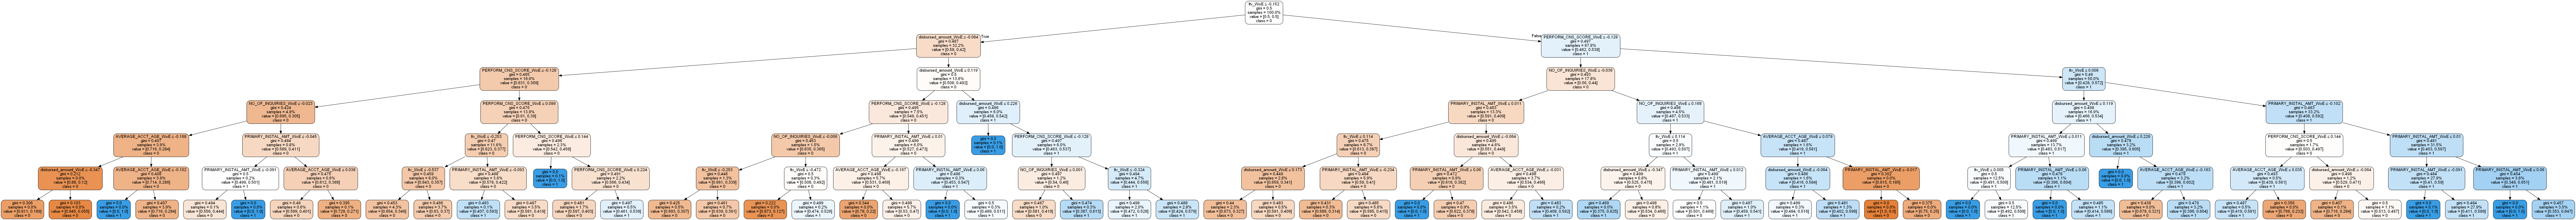

In [97]:
dot_data = tree.export_graphviz(clf_op, out_file=None, 
                         feature_names=x_train.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

# Decision Tree -Grid Search

#### HyperParameter Tuning -GridSearch-Cross Validation



In [246]:
import sklearn.model_selection as model_selection

In [249]:
import sklearn.model_selection as model_selection
mod_cv=model_selection.GridSearchCV(clf_op,param_grid=[{'max_depth':[2,3,4,5,6,7,None],"max_features":[1,2,3,4]}],cv=10)
mod_cv.fit(x_train, y_train)
mod_cv.best_params_

{'max_depth': 4, 'max_features': 4}

In [251]:
mod_cv.best_score_

0.5790323339027945

In [252]:
model_cv=mod_cv.best_estimator_
print(model_cv)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=11, splitter='best')


#### Feature Importance

In [253]:
pd.Series(model_cv.feature_importances_,index=x_train.columns).sort_values(ascending=False)

disbursed_amount_WoE      0.356832
PERFORM_CNS_SCORE_WoE     0.319834
ltv_WoE                   0.186911
NO_OF_INQUIRIES_WoE       0.101509
PRIMARY_INSTAL_AMT_WoE    0.034915
AVERAGE_ACCT_AGE_WoE      0.000000
const                     0.000000
dtype: float64

### Make predictions on Train data


In [254]:
predictions_train_op = clf_op.predict(x_train)
predict_prob_train_op=clf_op.predict_proba(x_train)

#### Performance Metrics Train data

ROC-AUC score of the model   : 0.5831252747499256
F1 Score                     : 0.3837246570951915

Precision                    : 0.2705935533224382

Recall                       : 0.6594170150265507

Accuracy of the model        : 0.539973007790933 

Confusion matrix             : 
[[64675 62931]
 [12058 23346]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.51      0.63    127606
           1       0.27      0.66      0.38     35404

   micro avg       0.54      0.54      0.54    163010
   macro avg       0.56      0.58      0.51    163010
weighted avg       0.72      0.54      0.58    163010




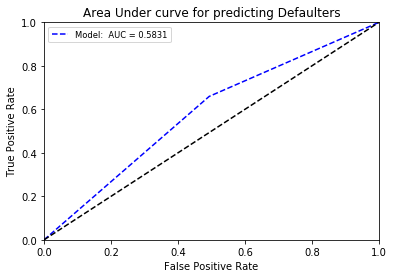

In [255]:
evaluate_model(y_train, predictions_train_op,predict_prob_train_op)

### Make predictions on test data


In [256]:
predictions_op = clf_op.predict(x_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions_op})  
predict_prob_op=clf_op.predict_proba(x_test)
df.head()  


,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


#### Performance Metrics Test data

ROC-AUC score of the model   : 0.5813486362388457
F1 Score                     : 0.38187241412489176

Precision                    : 0.26970018211965535

Recall                       : 0.6537954665260939

Accuracy of the model        : 0.5403668937095759 

Confusion matrix             : 
[[27841 26867]
 [ 5254  9922]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.51      0.63     54708
           1       0.27      0.65      0.38     15176

   micro avg       0.54      0.54      0.54     69884
   macro avg       0.56      0.58      0.51     69884
weighted avg       0.72      0.54      0.58     69884




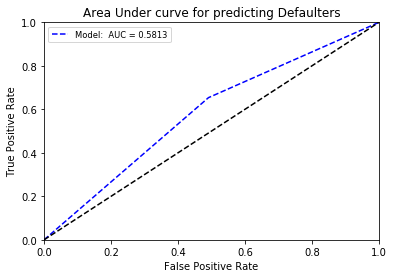

In [257]:
evaluate_model(y_test, predictions_op,predict_prob_op)

### Decision Tree Visualisation:Best Estimator

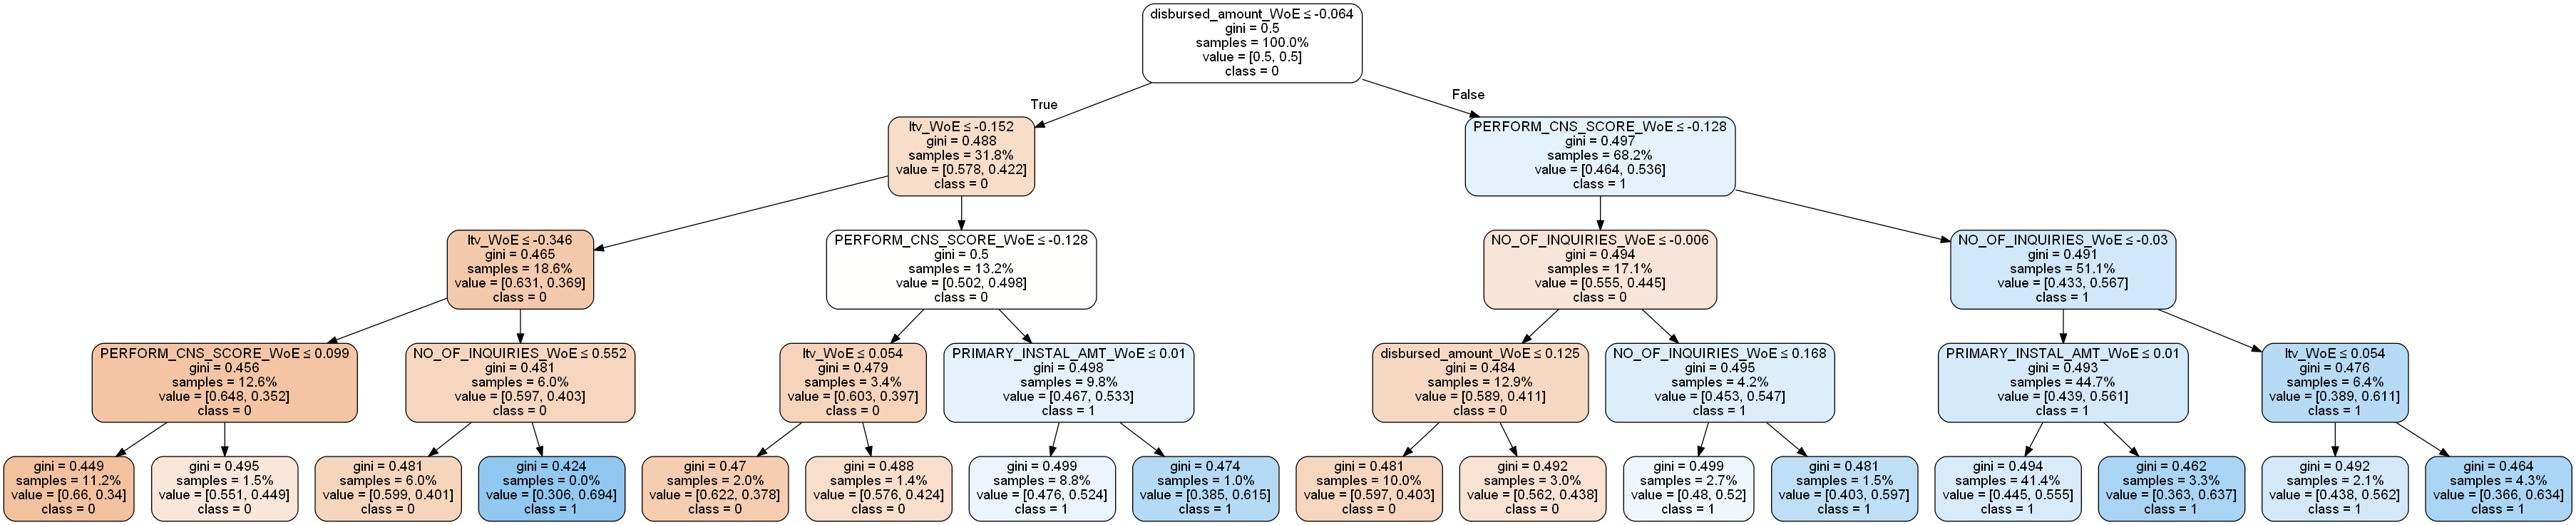

In [176]:
dot_data = tree.export_graphviz(model_cv, out_file=None, 
                         feature_names=x_train.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

Observations:

    The decison tree wil grid serach cv is performing much better than the default decision tree. At the max_depth of 4 and max_feature of 1, The decision tree has high recall score for making good distigunish between the non default and default customers.

# Random Forest Classifier

In [109]:
from imblearn.over_sampling import SMOTE

In [157]:
from imblearn.ensemble import BalancedRandomForestClassifier
Rf = BalancedRandomForestClassifier(max_depth=6,verbose=True,random_state=10,n_estimators=500)
Rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=6, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=2, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
                oob_score=False, random_state=10, replacement=False,
                sampling_strategy='auto', verbose=True, warm_start=False)

#### Make prediction on train data

In [158]:
y_train_pred = Rf.predict(x_train)
y_train_prob =Rf.predict_proba(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.3s finished


#### Perfomance Metrics on Train data

ROC-AUC score of the model   : 0.5824408532518395
F1 Score                     : 0.38376742941038106

Precision                    : 0.2691883157523413

Recall                       : 0.6681730877866908

Accuracy of the model        : 0.5339488374946322 

Confusion matrix             : 
[[63383 64223]
 [11748 23656]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.50      0.63    127606
           1       0.27      0.67      0.38     35404

   micro avg       0.53      0.53      0.53    163010
   macro avg       0.56      0.58      0.50    163010
weighted avg       0.72      0.53      0.57    163010




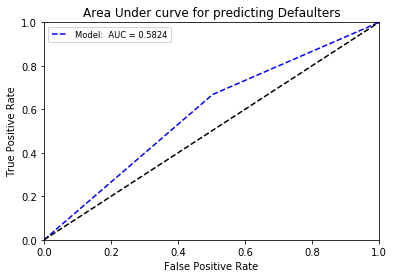

In [159]:
evaluate_model(y_train, y_train_pred,y_train_prob)

#### Make prediction on test data

In [160]:
y_pred = Rf.predict(x_test)
y_pred_prob = Rf.predict_proba(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished


#### Validation on test data

ROC-AUC score of the model   : 0.5823233394689413
F1 Score                     : 0.3834393694805812

Precision                    : 0.26935083646842234

Recall                       : 0.665195044807591

Accuracy of the model        : 0.5354444508041898 

Confusion matrix             : 
[[27324 27384]
 [ 5081 10095]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.50      0.63     54708
           1       0.27      0.67      0.38     15176

   micro avg       0.54      0.54      0.54     69884
   macro avg       0.56      0.58      0.51     69884
weighted avg       0.72      0.54      0.57     69884




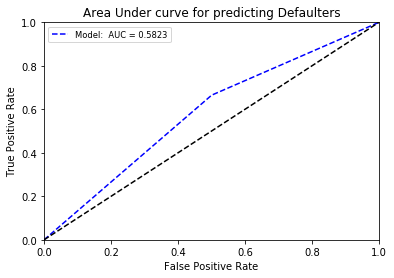

In [161]:
evaluate_model(y_test, y_pred,y_pred_prob)

observations

Random forest has highest recall score and it is predcting the higher number of defaults 

# Gradient Boosting 

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
gb_model = GradientBoostingRegressor(max_depth=8, n_estimators=250, learning_rate=0.01, random_state=123)
gb_model.fit(x_train, y_train)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, n_iter_no_change=None, presort='auto',
             random_state=123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

#### Make prediction on train data

In [142]:
predictions_train = gb_model.predict(x_train)
predictions_train

array([0.35496006, 0.4650392 , 0.57734633, ..., 0.57734633, 0.57734633,
       0.5780405 ])

#### performance Metrics train data

ROC-AUC score of the model   : 0.5881031440795264
F1 Score                     : 0.38532543137357744

Precision                    : 0.2790070634699613

Recall                       : 0.6225567732459609

Accuracy of the model        : 0.568615422366726 

Confusion matrix             : 
[[70649 56957]
 [13363 22041]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.55      0.67    127606
           1       0.28      0.62      0.39     35404

   micro avg       0.57      0.57      0.57    163010
   macro avg       0.56      0.59      0.53    163010
weighted avg       0.72      0.57      0.61    163010




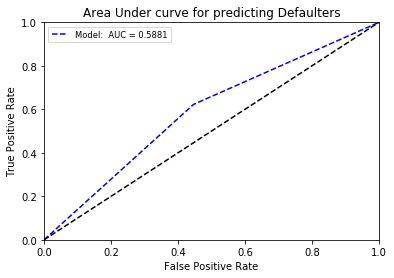

In [143]:
evaluate_model(y_train,predictions_train.round(), predictions_train)

#### Make prediction on test data

In [147]:

predictions = gb_model.predict(x_test)

#### Validation - performance Metrics Test data

ROC-AUC score of the model   : 0.5839736572012416
F1 Score                     : 0.3811121567985597

Precision                    : 0.27636342056851226

Recall                       : 0.6137322087506589

Accuracy of the model        : 0.5671398317211379 

Confusion matrix             : 
[[30320 24388]
 [ 5862  9314]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.55      0.67     54708
           1       0.28      0.61      0.38     15176

   micro avg       0.57      0.57      0.57     69884
   macro avg       0.56      0.58      0.52     69884
weighted avg       0.72      0.57      0.61     69884




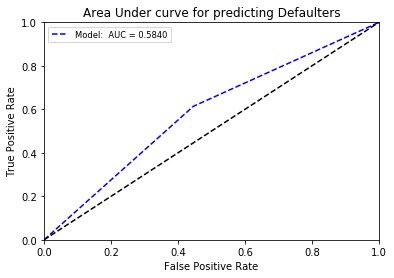

In [149]:
evaluate_model(y_test,predictions.round(), predictions)

# AdaBoost

In [150]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [151]:
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=200, learning_rate=0.01, random_state=123)
ada_model.fit(x_train, y_train)
ada_model

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.01, loss='linear', n_estimators=200,
         random_state=123)

#### Make Predictions on train data

In [152]:
predictions = ada_model.predict(x_train)

#### Performance metrics on train data

ROC-AUC score of the model   : 0.5822941328448985
F1 Score                     : 0.38318452989844265

Precision                    : 0.26974525595382115

Recall                       : 0.6612812111625805

Accuracy of the model        : 0.5376173240905466 

Confusion matrix             : 
[[64225 63381]
 [11992 23412]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.50      0.63    127606
           1       0.27      0.66      0.38     35404

   micro avg       0.54      0.54      0.54    163010
   macro avg       0.56      0.58      0.51    163010
weighted avg       0.72      0.54      0.58    163010




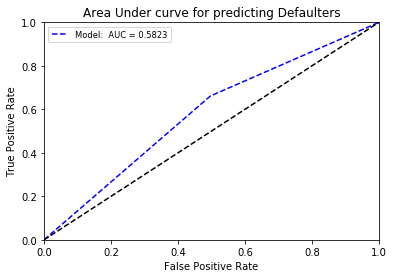

In [153]:
evaluate_model(y_train, predictions.round(),predictions)

#### Validation -Making predictions on test data

In [154]:

predictions = ada_model.predict(x_test)

ROC-AUC score of the model   : 0.5811895296788019
F1 Score                     : 0.3819255396648902

Precision                    : 0.2693181203698697

Recall                       : 0.6563653136531366

Accuracy of the model        : 0.5386640718905615 

Confusion matrix             : 
[[27683 27025]
 [ 5215  9961]]

Classification report        : 
              precision    recall  f1-score   support

           0       0.84      0.51      0.63     54708
           1       0.27      0.66      0.38     15176

   micro avg       0.54      0.54      0.54     69884
   macro avg       0.56      0.58      0.51     69884
weighted avg       0.72      0.54      0.58     69884




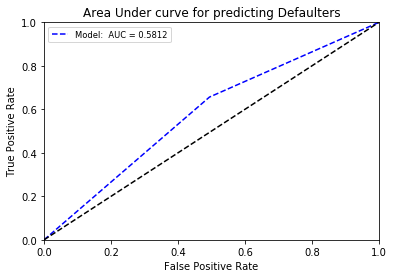

In [155]:
evaluate_model(y_test, predictions.round(),predictions)

#### Observations:

The performance of the test and the train data are almost similar.

# Voting Classifiers

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [129]:
log_model = LogisticRegression()
dtree_model = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('lr', log_model), ('dtree', dtree_model)], voting='hard')
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dtree', Decis...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

#### Preformance metrics on train  data

In [180]:
for model in (log_model, dtree_model, ensemble):
    model.fit(x_train, y_train)
    predictions = model.predict(x_train)
    print(model.__class__.__name__, 'Accuracy_score-->',accuracy_score(y_train, predictions))
    print(model.__class__.__name__,' F1_score-->' ,f1_score(y_train, predictions))
    print(model.__class__.__name__, 'Precision-->',precision_score(y_train, predictions))
    print(model.__class__.__name__,'Recall-->' ,recall_score(y_train, predictions))
    print(model.__class__.__name__,'confusion_matrix-->', confusion_matrix(y_train, predictions))
    print(model.__class__.__name__, (classification_report(y_train, predictions)))

LogisticRegression Accuracy_score--> 0.7828108704987424
LogisticRegression  F1_score--> 0.000959422089282691
LogisticRegression Precision--> 0.5
LogisticRegression Recall--> 0.00048017173200768276
LogisticRegression confusion_matrix--> [[127589     17]
 [ 35387     17]]
LogisticRegression               precision    recall  f1-score   support

           0       0.78      1.00      0.88    127606
           1       0.50      0.00      0.00     35404

   micro avg       0.78      0.78      0.78    163010
   macro avg       0.64      0.50      0.44    163010
weighted avg       0.72      0.78      0.69    163010

DecisionTreeClassifier Accuracy_score--> 0.7857616097171952
DecisionTreeClassifier  F1_score--> 0.03652716086848567
DecisionTreeClassifier Precision--> 0.7852906287069988
DecisionTreeClassifier Recall--> 0.018698452152299174
DecisionTreeClassifier confusion_matrix--> [[127425    181]
 [ 34742    662]]
DecisionTreeClassifier               precision    recall  f1-score   support

  

In [130]:
for model in (log_model, dtree_model, ensemble):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(model.__class__.__name__, 'Accuracy_score-->',accuracy_score(y_test, predictions))
    print(model.__class__.__name__,' F1_score-->' ,f1_score(y_test, predictions))
    print(model.__class__.__name__, 'Precision-->',precision_score(y_test, predictions))
    print(model.__class__.__name__,'Recall-->' ,recall_score(y_test, predictions))
    print(model.__class__.__name__,'confusion_matrix-->', confusion_matrix(y_test, predictions))
    print(model.__class__.__name__, (classification_report(y_test, predictions)))

LogisticRegression Accuracy_score--> 0.7827256596645871
LogisticRegression  F1_score--> 0.0007896814951302974
LogisticRegression Precision--> 0.3
LogisticRegression Recall--> 0.00039536109646810753
LogisticRegression confusion_matrix--> [[54694    14]
 [15170     6]]
LogisticRegression               precision    recall  f1-score   support

           0       0.78      1.00      0.88     54708
           1       0.30      0.00      0.00     15176

   micro avg       0.78      0.78      0.78     69884
   macro avg       0.54      0.50      0.44     69884
weighted avg       0.68      0.78      0.69     69884

DecisionTreeClassifier Accuracy_score--> 0.7807509587316124
DecisionTreeClassifier  F1_score--> 0.01693827794174259
DecisionTreeClassifier Precision--> 0.32195121951219513
DecisionTreeClassifier Recall--> 0.008697944122298365
DecisionTreeClassifier confusion_matrix--> [[54430   278]
 [15044   132]]
DecisionTreeClassifier               precision    recall  f1-score   support

        

### Observations

Both the logistic regression and the decision trees are both weak learners , the VotingClassifier is not able to perform well on test and train data.
    The recall score and the F1 score are pretty low for it to be a good predictive model.

# Creating the scorecard

In [258]:
train1 = pd.concat([x_train.reset_index(drop='True'),y_train.reset_index(drop='True')],axis=1)

train1['log_probs_nor'] =logisticRegr_norm.predict_proba(x_train)[:, 1]
def log_odds(J2):
    return np.log(J2/(1-J2))
train1['log_odds']=log_odds(train1['log_probs_nor'])

In [260]:
train1['log_odds'].round(2)
train1.head()

,const,disbursed_amount_WoE,ltv_WoE,AVERAGE_ACCT_AGE_WoE,PERFORM_CNS_SCORE_WoE,PRIMARY_INSTAL_AMT_WoE,NO_OF_INQUIRIES_WoE,loan_default,log_probs_nor,log_odds
0,1.0,-0.613509,-0.543835,0.082113,0.099099,0.010278,-0.037588,0,0.122579,-1.968227
1,1.0,-0.247470,0.005106,-0.101429,0.144502,-0.365457,-0.037588,0,0.144404,-1.779184
2,1.0,0.119263,0.222133,0.082113,0.099099,0.010278,-0.037588,0,0.277026,-0.959264
3,1.0,0.119263,0.222133,-0.101429,0.099099,-0.091224,-0.037588,0,0.250146,-1.097835
4,1.0,-0.446939,-0.543835,0.082113,0.099099,0.010278,-0.037588,0,0.133472,-1.870602


In [259]:
test1 = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True')],axis=1)

test1['log_probs_nor'] =logisticRegr_norm.predict_proba(x_test)[:, 1]
def log_odds(J2):
    return np.log(J2/(1-J2))
test1['log_odds']=log_odds(test1['log_probs_nor'])

In [261]:
def calculate_score(log_odds):
  
    return np.floor((500-((log_odds+np.log(1))*200/np.log(2))))+1
test1['scores'] = calculate_score(test1['log_odds'])
train1['scores'] = calculate_score(train1['log_odds'])




In [309]:
test1['log_odds'].round(2)
test1.head()

,const,disbursed_amount_WoE,ltv_WoE,AVERAGE_ACCT_AGE_WoE,PERFORM_CNS_SCORE_WoE,PRIMARY_INSTAL_AMT_WoE,NO_OF_INQUIRIES_WoE,loan_default,log_probs_nor,log_odds,scores,log_odds_bin
0,1.0,0.119263,0.222133,0.082113,0.099099,0.010278,-0.037588,0,0.277026,-0.959264,777.0,9
1,1.0,-0.247470,-0.352510,-0.101429,0.144502,-0.044568,-0.037588,0,0.162757,-1.637853,973.0,13
2,1.0,0.119263,-0.352510,-0.101429,0.099099,0.010278,-0.037588,0,0.197452,-1.402294,905.0,12
3,1.0,0.119263,0.222133,-0.101429,0.144502,-0.044568,0.160101,0,0.315142,-0.776187,724.0,8
4,1.0,0.119263,0.222133,-0.101429,-0.356078,0.059947,0.160101,0,0.233106,-1.190857,844.0,10


In [300]:
def log_odds_bin(x):
    
    if x <  200:
        return 1
    elif x <= 200:
        return 2
    elif x <= 500:
        return 3
    elif x <= 550:
        return 4
    elif x <= 600:
        return 5
    elif x <= 650:
        return 6
    elif x <= 700:
        return 7
    elif x <= 750:
        return 8
    elif x <= 800:
        return 9
    elif x <= 850:
        return 10
    elif x <= 900:
        return 11
    elif x <= 950:
        return 12
    elif x <= 1000:
        return 13
    elif x <= 1050:
        return 14
    elif x <= 1100:
        return 15
    elif x <= 1150:
        return 16
    elif x <= 1200:
        return 17
    elif x <= 1250:

        return 18
    elif x <= 1300:
        return 19
    else :
        return 20
        
test1['log_odds_bin']=(test1['scores']).apply(log_odds_bin)
train1['log_odds_bin']=(train1['scores']).apply(log_odds_bin)


In [301]:
def log_odds_range(x):
    
    if x <=1 :
        return 0
    elif x <= 2:
        return 400
    elif x <= 3:
        return 450
    elif x <= 4:
        return 500
    elif x <= 5:
        return 550
    elif x <= 6:
        return 600
    elif x <= 7:
        return 650
    elif x <= 8:
        return 700
    elif x <= 9:
        return 750
    elif x <= 10:
        return 800
    elif x <= 11:
        return 850
    elif x <= 12:
        return 900
    elif x <= 13:
        return 950
    elif x <= 14:
        return 1000
    elif x <= 15:
        return 1050
    elif x <= 16:
        return 1100
    elif x <= 17:
        return 1150
    elif x <= 18:
        return 1200
    elif x <= 19:
        return 1250
    else :
        return 1300
        



In [303]:
data_score_distn_test = calc_score(test1, 'log_odds_bin', 'loan_default')
data_score_distn_test['Cuml_Bad_Rate'] =data_score_distn_test['Bad'].cumsum()*100/data_score_distn_test['Bad'].sum()
data_score_distn_test['Cuml_loan_count'] =data_score_distn_test['Count'].cumsum()*100/data_score_distn_test['Count'].sum()
score_cutoff = pd.read_csv('score.csv')
variable_score_cutoff = pd.read_csv('vscore.csv')
data_score_distn_test['score_band'] = data_score_distn_test['Value'].apply(log_odds_range)
def fn_calc(x):
    return (100-x)/100
data_score_distn_test['percent_Pop']= data_score_distn_test['Cuml_loan_count'].apply(fn_calc)
data_score_distn_test

,Variable,Value,Count,Bad,Bad_Rate,Percent_count,Cuml_Bad_Rate,Cuml_loan_count,score_band,percent_Pop
0,log_odds_bin,3,20,6,0.300000,0.000286,0.039536,0.028619,450,0.999714
1,log_odds_bin,4,60,27,0.450000,0.000859,0.217449,0.114475,500,0.998855
2,log_odds_bin,5,97,29,0.298969,0.001388,0.408540,0.253277,550,0.997467
3,log_odds_bin,6,370,145,0.391892,0.005294,1.363996,0.782726,600,0.992173
4,log_odds_bin,7,1384,463,0.334538,0.019804,4.414866,2.763150,650,0.972368
5,log_odds_bin,8,2835,890,0.313933,0.040567,10.279389,6.819873,700,0.931801
6,log_odds_bin,9,15307,4269,0.278892,0.219034,38.409331,28.723313,750,0.712767
7,log_odds_bin,10,11484,2970,0.258621,0.164329,57.979705,45.156259,800,0.548437
8,log_odds_bin,11,7885,1670,0.211795,0.112830,68.983922,56.439242,850,0.435608
9,log_odds_bin,12,11648,2128,0.182692,0.166676,83.006062,73.106863,900,0.268931


In [310]:
data_score_distn_train = calc_score(train1, 'log_odds_bin', 'loan_default')
data_score_distn_train['Cuml_Bad_Rate'] =data_score_distn_train['Bad'].cumsum()*100/data_score_distn_train['Bad'].sum()
data_score_distn_train['Cuml_loan_count'] =data_score_distn_train['Count'].cumsum()*100/data_score_distn_train['Count'].sum()
score_cutoff = pd.read_csv('score.csv')
variable_score_cutoff = pd.read_csv('vscore.csv')
data_score_distn_train['score_band'] = data_score_distn_train['Value'].apply(log_odds_range)
def fn_calc(x):
    return (100-x)/100
data_score_distn_train['percent_Pop']= data_score_distn_train['Cuml_loan_count'].apply(fn_calc)
data_score_distn_train

,Variable,Value,Count,Bad,Bad_Rate,Percent_count,Cuml_Bad_Rate,Cuml_loan_count,score_band,percent_Pop
0,log_odds_bin,3,34,17,0.500000,0.000209,0.048017,0.020858,450,0.999791
1,log_odds_bin,4,113,46,0.407080,0.000693,0.177946,0.090179,500,0.999098
2,log_odds_bin,5,200,77,0.385000,0.001227,0.395436,0.212870,550,0.997871
3,log_odds_bin,6,936,364,0.388889,0.005742,1.423568,0.787068,600,0.992129
4,log_odds_bin,7,3281,1066,0.324901,0.020128,4.434527,2.799828,650,0.972002
5,log_odds_bin,8,6782,2097,0.309201,0.041605,10.357587,6.960309,700,0.930397
6,log_odds_bin,9,35743,10041,0.280922,0.219269,38.718789,28.887185,750,0.711128
7,log_odds_bin,10,26657,6709,0.251679,0.163530,57.668625,45.240169,800,0.547598
8,log_odds_bin,11,18605,4073,0.218920,0.114134,69.172975,56.653580,850,0.433464
9,log_odds_bin,12,27022,4903,0.181445,0.165769,83.021692,73.230477,900,0.267695


Text(0, 0.5, 'Count')

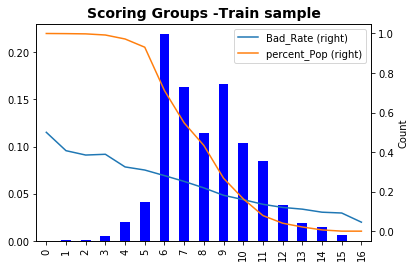

In [312]:
data_score_distn_train[['Bad_Rate','percent_Pop']].plot(kind='line',secondary_y=True)

data_score_distn_train['Percent_count'].plot(kind='bar',color="blue")
plt.title('Scoring Groups -Train sample', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

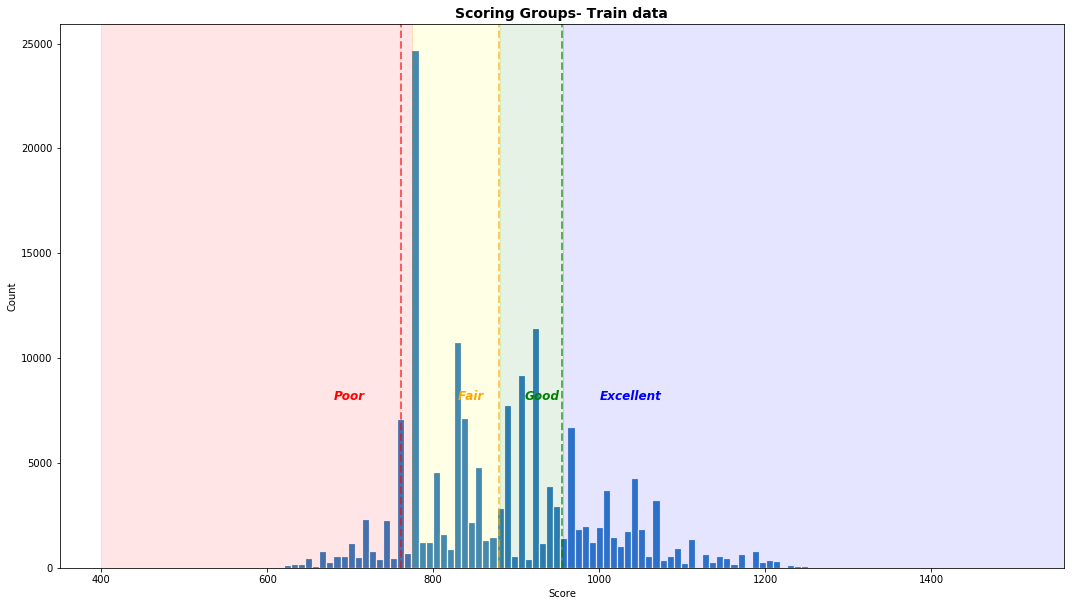

In [329]:
# Add Scoring Groups to Plot
plt.figure(figsize=(18,10))

plt.hist(train1['scores'],
         bins=100,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

plt.xlim(350,1560)
plt.title('Scoring Groups- Train data', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(train1['scores'],10), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(train1['scores'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(train1['scores'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)

# Text
plt.text(680, 7980, 'Poor', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(830, 7980, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=12)
plt.text(910, 7980, 'Good', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(1000, 7980, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=12)

# Shading between Percentiles
plt.axvspan(400, 775, alpha=0.1, color='red')
plt.axvspan(775, 880, alpha=0.1, color='yellow')
plt.axvspan(880, 956, alpha=0.1, color='green')
plt.axvspan(956, 2000, alpha=0.1, color='blue');

Text(0, 0.5, 'Count')

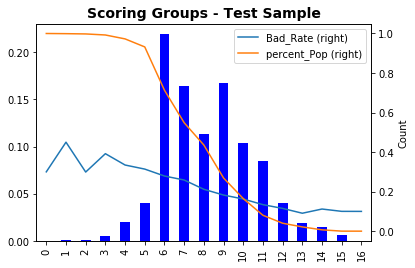

In [311]:
data_score_distn_test[['Bad_Rate','percent_Pop']].plot(kind='line',secondary_y=True)

data_score_distn_test['Percent_count'].plot(kind='bar',color="blue")
plt.title('Scoring Groups - Test Sample', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

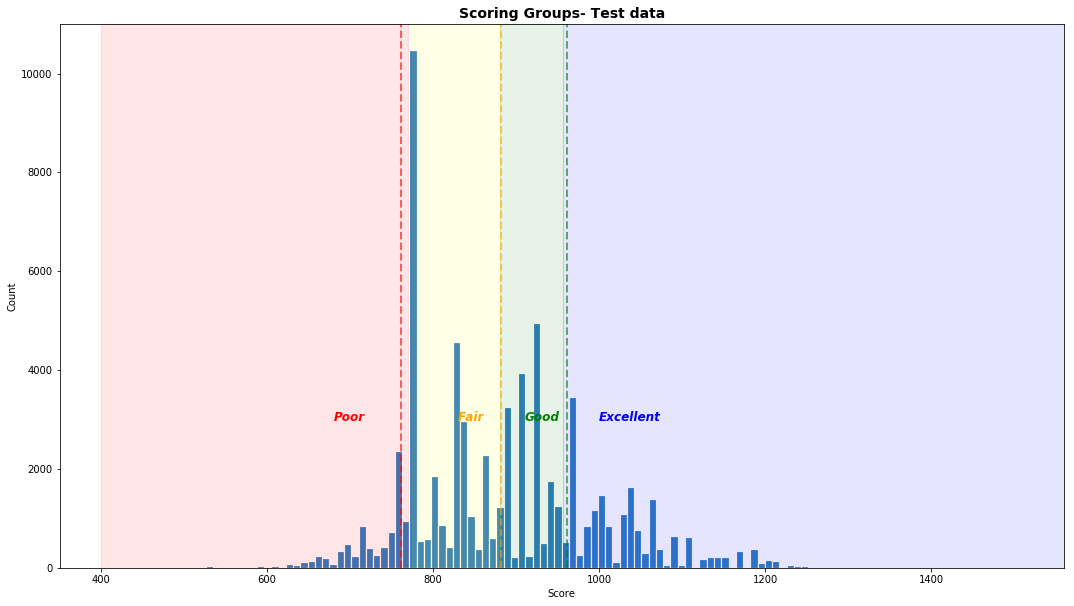

In [322]:
# Add Scoring Groups to Plot
plt.figure(figsize=(18,10))

plt.hist(test1['scores'],
         bins=100,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

plt.xlim(350,1560)
plt.title('Scoring Groups- Test data', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(test1['scores'],10), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(test1['scores'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(test1['scores'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)

# Text
plt.text(680, 2980, 'Poor', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(830, 2980, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=12)
plt.text(910, 2980, 'Good', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(1000, 2980, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=12)

# Shading between Percentiles
plt.axvspan(400, 770, alpha=0.1, color='red')
plt.axvspan(775, 880, alpha=0.1, color='yellow')
plt.axvspan(880, 956, alpha=0.1, color='green')
plt.axvspan(956, 2000, alpha=0.1, color='blue');

### Note : 
    The further analysis on scaled score is calculated in the excel sheet "Scaled Score - Cutoff point - Validation"

# Prediction on the Loan _test data

In [198]:
loan_test_woe.head()

,UniqueID,disbursed_amount_WoE,ltv_WoE,Age_WoE,AVERAGE_ACCT_AGE_WoE,PERFORM_CNS_SCORE_WoE,PRIMARY_INSTAL_AMT_WoE,PRI_CURRENT_BALANCE_WoE,PRI_NO_OF_ACCTS_WoE,NO_OF_INQUIRIES_WoE
0,655269,0.119263,0.222133,-0.100875,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588
1,723482,0.119263,0.222133,-0.012392,-0.101429,-0.356078,-0.044568,0.012608,-0.026540,0.160101
2,758529,0.227104,0.222133,0.148289,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588
3,763449,-0.247470,0.005106,-0.100875,-0.101429,0.099099,0.010278,-0.098797,0.028805,-0.037588
4,708663,0.119263,0.222133,-0.100875,0.082113,0.099099,0.010278,0.049865,0.080895,-0.037588


### Dropping the insignificant variables 

In [216]:
loan_test_woe=loan_test_woe.drop(['Age_WoE','PRI_CURRENT_BALANCE_WoE','PRI_NO_OF_ACCTS_WoE'],axis=1)

# Choosing the best model -Random forest classifier

In [218]:
y_train_pred = Rf.predict(loan_test_woe)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.7s finished


In [220]:
test=pd.DataFrame()
test['UniqueID']=loan_test_woe['UniqueID']
test['loan_default']=y_train_pred

In [221]:
test.shape

(112392, 2)

In [222]:
print('Total predicted defaulted in train dataset-->',y_train_pred.sum().round())


Total predicted defaulted in train dataset--> 63814


Around 50% of borrowers are predicted to be defualt for their 1st month EMI. The conculsion for the same has been explained the document

# Export the prediction results to CSV file

In [330]:

test.to_csv('Predictied_defaults_on_loan_test.csv', index=False, header=True)